### NLP - Notebook 1

### Exploratory Data Analysis of NLP Data

<b> Data Source and Project Description: </b>  

https://www.kaggle.com/c/til2020/data

The scope of this project will be to extract a series of clothing descriptors from a description of a person.

### Examination of the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('Data\TIL_NLP_train_dataset.csv')
print("Number of rows =", train_data.shape[0])
print("Number of columns =", train_data.shape[1])
print("\nSample of data:")
train_data.head()

Number of rows = 7380
Number of columns = 7

Sample of data:


id                                word_representation  outwear  top  \
0   0  w7718 w173355 w138132 w232277 w90685 w314686 w...        1    0   
1   1  w195317 w127737 w171593 w22890 w342007 w217871...        1    0   
2   2  w247655 w270233 w261113 w337250 w366000 w37873...        0    1   
3   3  w279289 w395855 w61795 w286461 w308610 w27013 ...        1    0   
4   4  w254516 w135431 w115724 w331534 w256214 w71240...        1    0   

   trousers  women dresses  women skirts  
0         1              0             0  
1         1              0             0  
2         1              0             0  
3         1              0             0  
4         1              0             0

Each data point has the following attributes.

	1.  id: a unique identifier for the row
	2.  word_representation: a sequence of varying length consisting of a masked sentence
	3.  outwear: 1 if the sentence contains a word representing outerwear, 0 otherwise
	4.  top: 1 if the sentence contains a word representing a top, 0 otherwise
	5.  trousers: 1 if the sentence contains a word representing trousers, 0 otherwise
	6.  women dresses: 1 if the sentence contains a word representing a woman’s dress, 0 otherwise
	7.  women skirts: 1 if the sentence contains a word representing a woman’s skirt, 0 otherwise

<b> Note: This dataset will be split into training and testing data after pre-processing in the notebook that follows.</b>

Looking at a random row:

In [2]:
print(train_data['word_representation'][5555])

w194870 w220342 w308610 w261297 w250980 w392167 w311583 w162756 w120502 w295346 w263923 w314686 w500510 w186076 w194870 w44158 w336842 w384021 w173688 w222895 w376233 w250138


In [3]:
print('Outwear ' + str(train_data['outwear'][5555]))
print('Top ' + str(train_data['top'][5555]))
print('Trousers ' + str(train_data['trousers'][5555]))
print('Women Dresses ' + str(train_data['women dresses'][5555]))
print('Women Skirts ' + str(train_data['women skirts'][5555]))

Outwear 1
Top 0
Trousers 1
Women Dresses 1
Women Skirts 0


We see that this row has three labels - thus we know we are dealing with a multi-label classification problem.

<b> 1 - Look at the dataset and examine for missing or inconsistent values. </b>

In [4]:
train_data.describe()

id      outwear          top     trousers  women dresses  \
count  7380.000000  7380.000000  7380.000000  7380.000000    7380.000000   
mean   3689.500000     0.446206     0.444580     0.556775       0.171409   
std    2130.566826     0.497131     0.496953     0.496800       0.376892   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%    1844.750000     0.000000     0.000000     0.000000       0.000000   
50%    3689.500000     0.000000     0.000000     1.000000       0.000000   
75%    5534.250000     1.000000     1.000000     1.000000       0.000000   
max    7379.000000     1.000000     1.000000     1.000000       1.000000   

       women skirts  
count   7380.000000  
mean       0.167480  
std        0.373429  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [5]:
train_data.dtypes

id                      int64
word_representation    object
outwear                 int64
top                     int64
trousers                int64
women dresses           int64
women skirts            int64
dtype: object

In [6]:
# Check for any missing values
train_data.isna().sum()

id                     0
word_representation    0
outwear                0
top                    0
trousers               0
women dresses          0
women skirts           0
dtype: int64

In [7]:
# Check for any values that are not 0 or 1
for column in train_data[['outwear', 'top', 'trousers', 'women dresses', 'women skirts']]:
    print(column, train_data[column].unique())

outwear [1 0]
top [0 1]
trousers [1 0]
women dresses [0 1]
women skirts [0 1]


In [8]:
# Check for any duplciated rows
duplicated_rows_df = train_data[train_data.duplicated()]
print("Duplicated Rows:")
print(duplicated_rows_df)

Duplicated Rows:
Empty DataFrame
Columns: [id, word_representation, outwear, top, trousers, women dresses, women skirts]
Index: []


<b> Summary: </b>
- We have no missing rows
- All rows are unique
- All labels are correctly either a 0 or a 1.

<b> 2 - Examination of the Labels </b>

In [9]:
# Count the number of each label in the dataset
count_dict = {}
for column in ['outwear', 'top', 'trousers', 'women dresses', 'women skirts']:
    count_dict[column] = train_data[column].sum()
print(count_dict)
print('Total Labels:', sum(count_dict.values()))

{'outwear': 3293, 'top': 3281, 'trousers': 4109, 'women dresses': 1265, 'women skirts': 1236}
Total Labels: 13184


C:\Users\mdjm0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


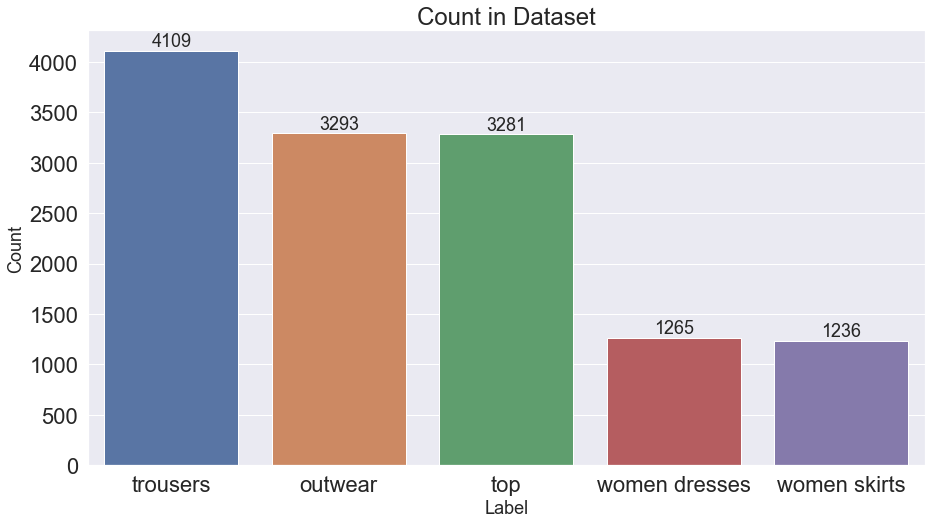

In [10]:
categories = ['trousers', 'outwear', 'top', 'women dresses', 'women skirts']
counts = [4109, 3293, 3281, 1265, 1236]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(categories, counts)
plt.xlabel('Label', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Count in Dataset', fontsize=24)

rects = ax.patches
labels = counts
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5, label, ha='center', va='bottom', fontsize=18)
plt.show()

<b> We see that for our 7,380 rows we have a total of 13,184 labels.  The next step will be to count the number of labels per row. </b>

In [11]:
rowSums = train_data.iloc[:,2:].sum(axis=1)
rowSums.value_counts()

2    5244
1    1856
3     280
dtype: int64

C:\Users\mdjm0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


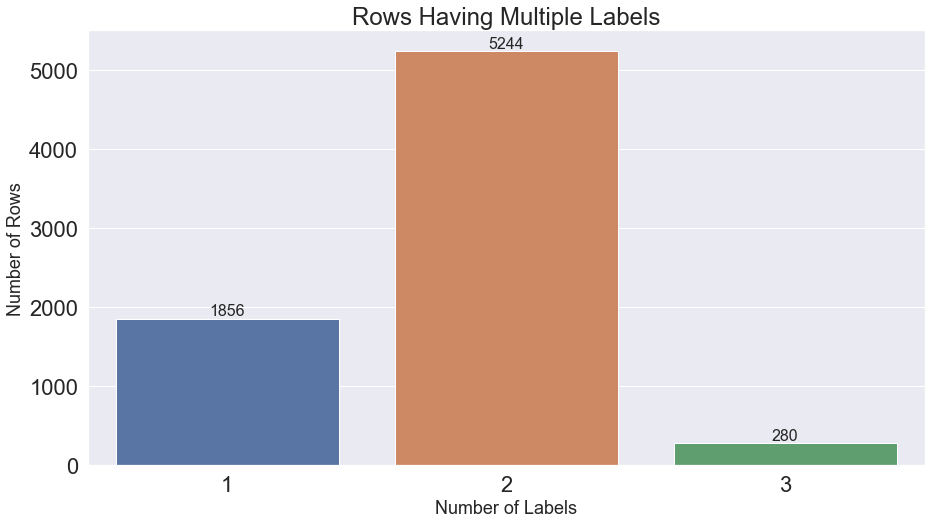

In [12]:
categories = [1, 2, 3]
counts = [1856, 5244, 280]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(categories, counts)
plt.title("Rows Having Multiple Labels")
plt.ylabel('Number of Rows', fontsize=18)
plt.xlabel('Number of Labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = counts
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)
plt.show()

<b> Summary: </b>
- We have 7,380 unique rows
- In total we have 13,184 labels 
- 1,856 rows have one label 
- 5,244 rows have two labels 
- 280 rows have three labels 
- No rows have zero, four, or five labels

<b> 3 - Examination of the "word_repsentation" Column </b>

The project provides us with English sentences that have been masked.  For example:

"He was walking out on the streets when someone spilled coffee onto his blue cashmere jacket and khaki trousers" 

is represented as:

"w11 w53 w243 w465 w6754 w3463 w6 w65344 w322 w9823 w33453 w84 w4356 w2234 w1246 w98302 w551 w8785 w344"

In [13]:
train_data['word_representation']

0       w7718 w173355 w138132 w232277 w90685 w314686 w...
1       w195317 w127737 w171593 w22890 w342007 w217871...
2       w247655 w270233 w261113 w337250 w366000 w37873...
3       w279289 w395855 w61795 w286461 w308610 w27013 ...
4       w254516 w135431 w115724 w331534 w256214 w71240...
                              ...                        
7375    w373517 w350483 w37419 w162965 w286461 w35248 ...
7376    w261297 w162756 w283853 w500021 w256905 w22079...
7377    w58536 w182664 w317736 w261297 w91800 w314686 ...
7378    w194870 w122953 w256905 w66217 w207614 w34893 ...
7379    w194870 w122953 w66217 w207614 w34893 w56481 w...
Name: word_representation, Length: 7380, dtype: object

In [14]:
# Count the number of words in each row
num_words = []
for i in range (7380):
    x = train_data['word_representation'].iloc[i].split()
    y = len(x)
    num_words.append(y)

words = pd.DataFrame(data=num_words, columns=['Word Count'])
words

Word Count
0             21
1             15
2             21
3             16
4             15
...          ...
7375          13
7376          18
7377          21
7378          28
7379          28

[7380 rows x 1 columns]

In [15]:
print(words.max())

Word Count    47
dtype: int64


In [16]:
print(words.min())

Word Count    8
dtype: int64


In [17]:
print(words.mean())

Word Count    19.740786
dtype: float64


<b> Summary: </b>
- The average row consists of about 20 words
- The longest row has 47 words
- The shortest row has 8 words

<b> 4 - Examination of Masked Words </b>

https://www.kaggle.com/c/til2020/data provides the 'word_embeddings.pkl'

In [18]:
import pickle
with open ('Data\word_embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

print(type(embeddings))

<class 'dict'>


In [19]:
embeddings.keys()

dict_keys(['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11', 'w12', 'w13', 'w14', 'w15', 'w16', 'w17', 'w18', 'w19', 'w20', 'w21', 'w22', 'w23', 'w24', 'w25', 'w26', 'w27', 'w28', 'w29', 'w30', 'w31', 'w32', 'w33', 'w34', 'w35', 'w36', 'w37', 'w38', 'w39', 'w40', 'w41', 'w42', 'w43', 'w44', 'w45', 'w46', 'w47', 'w48', 'w49', 'w50', 'w51', 'w52', 'w53', 'w54', 'w55', 'w56', 'w57', 'w58', 'w59', 'w60', 'w61', 'w62', 'w63', 'w64', 'w65', 'w66', 'w67', 'w68', 'w69', 'w70', 'w71', 'w72', 'w73', 'w74', 'w75', 'w76', 'w77', 'w78', 'w79', 'w80', 'w81', 'w82', 'w83', 'w84', 'w85', 'w86', 'w87', 'w88', 'w89', 'w90', 'w91', 'w92', 'w93', 'w94', 'w95', 'w96', 'w97', 'w98', 'w99', 'w100', 'w101', 'w102', 'w103', 'w104', 'w105', 'w106', 'w107', 'w108', 'w109', 'w110', 'w111', 'w112', 'w113', 'w114', 'w115', 'w116', 'w117', 'w118', 'w119', 'w120', 'w121', 'w122', 'w123', 'w124', 'w125', 'w126', 'w127', 'w128', 'w129', 'w130', 'w131', 'w132', 'w133', 'w134', 'w135', 'w136', 'w1

This is a dictionary containing 400,000 keys.  Each key is a masking for a specific word. 

In [20]:
# Examine one of the values in the dictionary
word_0 = embeddings['w0']
print(word_0)
print(word_0.shape)
type(word_0)

[ 0.40654   -0.41092   -0.39071    0.062906   0.15333   -0.26485
  0.56404   -0.8641     0.86304    0.19451    0.5355     0.094875
  0.085875  -0.51489   -0.21682    0.088318   0.064861   0.38166
  0.32641   -0.49893    0.0048443 -0.1177     0.17858    0.028307
 -0.58475    0.36995   -0.073554  -0.1451     0.046624   0.16584
  0.22882   -0.51723    0.18545    0.93583    0.11245    0.41794
  0.37232    0.45714    0.24696    0.501      0.52317    0.21859
  0.31735    0.44231   -0.3263     0.33098    0.1798    -0.39722
  0.09817    0.67025   -0.16198    0.39253    0.22014   -0.45854
 -0.35309    0.78       0.010165   0.11139   -0.51422    0.32387
 -0.29391   -0.22067    0.57543   -0.6795    -0.32692    0.35104
  0.25093   -0.27053   -0.68206    0.17815    0.2284     0.48252
  0.20842    0.27814    0.088662  -0.03546   -0.0503    -0.73326
  0.56436    0.1688     0.035918  -0.24458    0.38599   -0.16205
  0.54704   -0.073582  -0.058197   0.10077   -0.39236   -0.48661
  0.56568    0.39652   

numpy.ndarray

Examining the value for the key "w0" we see a 100-dimensional vector.  These vectors were generated using the GloVe model.

<b> 5 - Overview: Global Vectors for Word Representation (GloVe) </b>

Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation. 

https://nlp.stanford.edu/projects/glove/

Pre-Trained Word Vectors:
glove.6B.zip 
 - Contains 400,000 uncased vocabulary examples
 - Trained on 6 billion tokens from Wikipedia and Gigaword 5
 - The Euclidean distance between word vectors measures the linguistic similarity of the two words
 - The model attempts to capture as much meaning as possible
 - For example, the distance between "man" and "woman" is roughly equal to the distance between "king" and "queen"

In [21]:
# Import the GloVe pre-trained vectors and store in an ordered dictionary
import collections
glove_embeddings = collections.OrderedDict()

with open('Data\glove.6B.100d.txt', encoding='utf8') as file:
    for line in file:
        items = line.replace('\n', '').split(' ')
        glove_embeddings[items[0]] = items[1:]

As an example, we will compare the distances between word vectors "his" and "he", and then "his" and "apple.

In [22]:
his = np.array(glove_embeddings['his'])
he = np.array(glove_embeddings['he'])
apple = np.array(glove_embeddings['apple'])

In [23]:
type(his[0])

numpy.str_

In [24]:
# Convert the elments of the vectors from strings into floats
his = his.astype(float)
he = he.astype(float)
apple = apple.astype(float)

In [25]:
# Calculate the Euclidean Distance between the vectors
from scipy.spatial import distance

dist_his_he = distance.euclidean(his, he)
dist_his_apple = distance.euclidean(his, apple)

print('Euclidean Distance between "his" and "he":', dist_his_he)
print('Euclidean Distance between "his" and "apple":', dist_his_apple)

Euclidean Distance between "his" and "he": 3.842758537539546
Euclidean Distance between "his" and "apple": 7.60381607350244


<b>6 - Using GloVe to Find Similar Words</b>

In this section we will look at the word "pants" as an example.  We will generate a list of words that have the smallest Euclidean Distance with "pants".

In [26]:
# Get the GloVe vector for "pants"
# Then match this vector with its corresponding masked word in our word embeddings dictionary.

pants = glove_embeddings['pants']
for key, value in embeddings.items():
    masked = [str(x) for x in value]
    if masked == pants:
        print (key)

w314686


In [27]:
embeddings['w314686']

array([ 0.18038  ,  0.12416  , -0.14     , -0.91949  , -0.4085   ,
        0.50219  ,  0.58971  ,  0.77658  , -0.85048  ,  0.76098  ,
        0.4498   ,  0.15181  ,  0.98683  ,  0.31163  ,  0.89108  ,
        0.10358  , -0.066588 , -0.22185  ,  1.2097   , -1.5266   ,
        0.46763  ,  0.17922  ,  0.72929  , -0.64785  ,  0.45659  ,
        1.4758   , -0.92858  , -1.5823   , -0.26226  , -1.1909   ,
        0.3525   , -0.18272  , -0.23065  , -0.84626  ,  0.26499  ,
        1.2442   , -0.052566 ,  0.52875  ,  0.41211  ,  0.38305  ,
        0.72033  , -0.036726 , -0.23154  , -0.4205   , -0.99967  ,
       -0.41667  , -0.22963  ,  0.75167  ,  0.85183  , -0.59041  ,
       -0.38652  ,  0.88589  , -0.35185  ,  0.74991  , -0.2069   ,
       -1.0577   ,  0.15146  ,  0.24856  ,  0.72123  ,  0.44814  ,
       -0.14559  ,  0.71055  , -0.084595 ,  0.68966  ,  0.34895  ,
        0.0033459,  0.81293  , -0.12123  , -0.11764  ,  0.39266  ,
        0.65331  ,  0.1481   ,  0.12623  , -0.17469  ,  0.2668

In [28]:
# Calculate the Euclidean distance between "pants" and all over GloVe words
# Store these in a dictionary
distances = {}

# pants is currently a list - we convert to an array to match the type of the masked word above
pants = np.array(pants).astype(float)
for key, value in glove_embeddings.items():
    word = np.array(value)
    word = word.astype(float)
    # The values of this dictionary will be the distances between each word and "pants"
    distances[key] = distance.euclidean(word, pants)

In [29]:
# Sort the dictionary
sorted_distances = {k: v for k, v in sorted(distances.items(), key=lambda item: item[1])}

In [30]:
# Display the 20 closest words to "pants"
print(list(sorted_distances.items())[:20])

[('pants', 0.0), ('trousers', 2.516558591582127), ('jacket', 3.3385834607119182), ('jeans', 3.3545061873493407), ('shorts', 3.5678618139146043), ('socks', 3.699467596239025), ('baggy', 3.7084418447923353), ('boots', 3.7623630149208687), ('denim', 3.79082190676242), ('slacks', 3.826870936170388), ('shirt', 3.8719693475426906), ('skirts', 3.9076409828494354), ('sweater', 3.9729296258587325), ('skirt', 4.003303316075366), ('dresses', 4.0247174089247535), ('sneakers', 4.0704513317678135), ('blouse', 4.075191190399111), ('khaki', 4.09139011607726), ('leggings', 4.0987033281573755), ('sweaters', 4.104653032785874)]


This gives us an idea of how the GloVe model will allow us to measure word similarities.

<b> 7 - Examination of the Most Commonly Found Words in our Dataset </b>

As an example, we will perform an examination on all of the rows where "outwear" is given a label of 1.

In [31]:
outwear = train_data[train_data['outwear'] == 1]

In [32]:
outwear['word_representation']

0       w7718 w173355 w138132 w232277 w90685 w314686 w...
1       w195317 w127737 w171593 w22890 w342007 w217871...
3       w279289 w395855 w61795 w286461 w308610 w27013 ...
4       w254516 w135431 w115724 w331534 w256214 w71240...
5       w53495 w306061 w372126 w47982 w66980 w189406 w...
                              ...                        
7372    w181937 w290610 w221983 w254429 w366000 w21787...
7376    w261297 w162756 w283853 w500021 w256905 w22079...
7377    w58536 w182664 w317736 w261297 w91800 w314686 ...
7378    w194870 w122953 w256905 w66217 w207614 w34893 ...
7379    w194870 w122953 w66217 w207614 w34893 w56481 w...
Name: word_representation, Length: 3293, dtype: object

In [33]:
# Split each of these rows and store each masked word in a list.  
# From this list we will be able to count the number of occurrences of each word.
words = []

for i in list(outwear['word_representation'].index.values):
    row = outwear['word_representation'][i].split(' ')
    for element in row:
        words.append(element)

In [34]:
# These are all of the words that appear in all rows where "outwear" has a label of 1.
print(words)

['w7718', 'w173355', 'w138132', 'w232277', 'w90685', 'w314686', 'w256905', 'w292000', 'w217871', 'w148650', 'w220790', 'w207614', 'w20894', 'w247655', 'w500010', 'w136109', 'w172358', 'w66535', 'w80220', 'w255783', 'w15393', 'w195317', 'w127737', 'w171593', 'w22890', 'w342007', 'w217871', 'w289824', 'w500005', 'w85858', 'w241910', 'w194870', 'w192814', 'w127834', 'w263923', 'w241910', 'w279289', 'w395855', 'w61795', 'w286461', 'w308610', 'w27013', 'w272605', 'w287214', 'w15393', 'w217871', 'w751', 'w393636', 'w317227', 'w368487', 'w319927', 'w70969', 'w254516', 'w135431', 'w115724', 'w331534', 'w256214', 'w71240', 'w356796', 'w326106', 'w34893', 'w175250', 'w217578', 'w186076', 'w349078', 'w26969', 'w241910', 'w53495', 'w306061', 'w372126', 'w47982', 'w66980', 'w189406', 'w71392', 'w217871', 'w127234', 'w301260', 'w51947', 'w336335', 'w217871', 'w128523', 'w500123', 'w221983', 'w103141', 'w105773', 'w318673', 'w380347', 'w201668', 'w237465', 'w256553', 'w286461', 'w382662', 'w206066', 

In [35]:
# We use Counter to count the occurences of each unique word in this list.
# We will then print the top 50, along with the count for each.
from collections import Counter
c = Counter(words)
top50 = c.most_common(50)
print(top50)

[('w34893', 2072), ('w194870', 1525), ('w217871', 1183), ('w186076', 1094), ('w15393', 1084), ('w311583', 1070), ('w342007', 707), ('w66980', 626), ('w195317', 615), ('w286461', 603), ('w241910', 574), ('w120979', 563), ('w207614', 545), ('w111248', 542), ('w193800', 514), ('w374393', 511), ('w384021', 440), ('w71240', 438), ('w204762', 422), ('w121255', 410), ('w373517', 378), ('w270233', 368), ('w225739', 357), ('w250138', 354), ('w115724', 346), ('w314686', 340), ('w75397', 322), ('w256214', 321), ('w197783', 307), ('w33992', 306), ('w221983', 303), ('w256553', 291), ('w162756', 280), ('w36882', 278), ('w20297', 274), ('w105773', 273), ('w1867', 261), ('w254429', 259), ('w151648', 246), ('w237465', 238), ('w380494', 237), ('w286596', 235), ('w155034', 233), ('w318673', 231), ('w253354', 230), ('w392167', 224), ('w240587', 212), ('w93366', 212), ('w382355', 211), ('w276473', 208)]


For each of these masked words we are given its 100-dimensional vector in the "word_embeddings.pkl" file.

We then use these vectors to match each masked word to its English word as given in the GloVe pre-trained vector file.  We then will create a list of these words.

In [36]:
"""
This function will take a masked word, get its embedding and then convert to a list of strings to
match the format of the GloVe vectors.  It will then search the dictionary to find the GloVe key (English word)
that matches this vector.
"""

def mask_to_english(inputword):
    masked = embeddings[inputword]
    word_list = []
    for item in masked:
        word_list.append(str(item))
    
    for key, value in glove_embeddings.items():
        if value == word_list:
            return key

In [37]:
# top50 is a list of tuples - we will unzip and extract the first element of each
x = list(list(zip(*top50))[0])
print(x)

['w34893', 'w194870', 'w217871', 'w186076', 'w15393', 'w311583', 'w342007', 'w66980', 'w195317', 'w286461', 'w241910', 'w120979', 'w207614', 'w111248', 'w193800', 'w374393', 'w384021', 'w71240', 'w204762', 'w121255', 'w373517', 'w270233', 'w225739', 'w250138', 'w115724', 'w314686', 'w75397', 'w256214', 'w197783', 'w33992', 'w221983', 'w256553', 'w162756', 'w36882', 'w20297', 'w105773', 'w1867', 'w254429', 'w151648', 'w237465', 'w380494', 'w286596', 'w155034', 'w318673', 'w253354', 'w392167', 'w240587', 'w93366', 'w382355', 'w276473']


In [38]:
# For each of the top 50 masked words above, use the function mask_to_english to obtain the English words
top50_english = []
for i in x:
    y = mask_to_english(i)
    top50_english.append(y)
print(top50_english)

['a', 'the', 'and', 'to', 'jacket', 'with', 'hoodie', 'in', 'he', 'wearing', 'shorts', 'shirt', 'for', 'black', 'sleeve', 'of', 'neck', 'sweatshirt', 'adidas', 'long', 'his', 'you', 'on', 'dress', 'logo', 'pants', 'sweater', 'crew', 'short', 'top', 'skirt', 'was', 'zip', 'tee', 'look', 'from', 't', 'is', 'wear', 'she', 'denim', 'slim', 'it', 'her', 'together', 'blazer', 'be', 'as', 'pair', 'fit']


These are the 50 most commonly appearing words in all the rows that have a label of outwear.  We will vizualize these.

In [39]:
top50_str = (" ").join(top50_english)

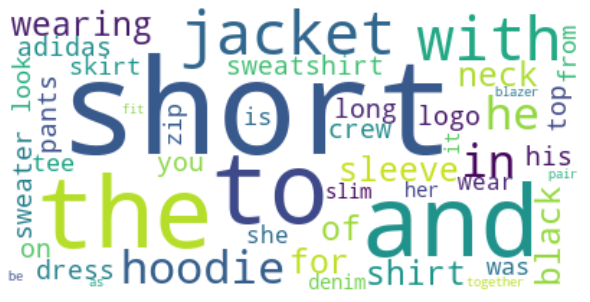

In [40]:
from wordcloud import WordCloud
cloud = WordCloud(stopwords=[], background_color='white').generate(top50_str)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

We see a lot of words that will be useful to us, but also a lot of common English words that will not be.  Let's remove some of these and examine the word cloud agian.

In [41]:
# We create a list of the most common English words that appear in this list and will remove them 
stop_words = ['to', 'of', 'in', 'it', 'is', 'was', 'on', 'from', 'you',
              'be', 'a', 'as', 'for', 'the', 'and', 'with']

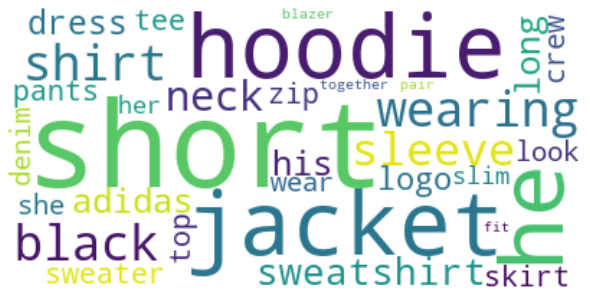

In [42]:
cloud2 = WordCloud(stopwords = stop_words, background_color='white').generate(top50_str)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud2, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<b> Summary: </b>
- We have words we would commonly associate with outerwear: jacket, hoodie, sweatshirt, sweater, blazer
- We have words that will correspond with our other labels: shirt, top, skirt, pants, tee
- We have words related to gender: he, she, his, her
- We have clothing descriptors: black, adidas, slim, denim, short, long, sleeve, zip, logo

<b> 8 - Next Step </b>

In the next notebook we will work on cleaning and pre-processing our data.  Part of this process will be generating a complete list of stop words and removing these from our dataset.

### Summary of EDA Findings:

- We have a dataset consisting of 7,380 unique rows - this will be split between training and testing
- Each row contains an "id", a "word_representation" and five labels, "outwear", "top", "trousers", "women dresses", "women skirts"
- Each label is given a 1 or a 0
- "trousers" has 4,109 instances, "outwear" has 3,293, "top" has 3,281, "women dresses" has 1,265, and "women skirts" has 1,236
- In total we have 13,184 labels
- Since each row can have multiple labels, we will explore multi-label classification algorithms
- 5,244 rows have two labels, 1,856 have one, and 280 have three
- "word_representation" consists of sequences of masked words
- Each masked word is represented by a 100-dimensional vector according to the GloVe model
- The most commonly appearing words are the most common English words - "a", "the", "and", "to"
- Data cleaning will be done to remove these words from the dataset
- We have an operational dataset consisting of 2,460 unique rows
- Each row contains an "id" and a "word_representation"